TEST#1 VA CONTINE DOAR EXERCITII DIN CAPITOLUL: Metode numerice de rezolvare a ecuatiilor algebrice

SA STITI CUM AU FOST CONSTRUITE METODELE, CARE SUNT IPOTEZELE PE CARE TREBUIE SA LE SATISFACA FUNCTIA SI CUM TREBUIE ALESE VALORILE INITIALE PENTRU CA METODA SA FIE CONVERGENTA (ENUNTURI DE TEOREME DE CONVERGENTA), ORDINUL VITEZEI DE CONVERGENTA PENTRU FIECARE METODA, DIVERSE OBSERVATII FACUTE LA CURS.

1. Metoda bisectiei

2. Metoda punctului fix

3. Metoda Newton Raphson

4. Metoda Newton Raphson pentru ecuatii cu ordinul de multiplicitate cunoscut

5. Metoda pozitiei false

6. Metoda secantei

In [ ]:
#Metoda Bisectiei2

Aproximarea rădăcinii: 1.7320508137345314
Numărul de iterații efectuate: 26


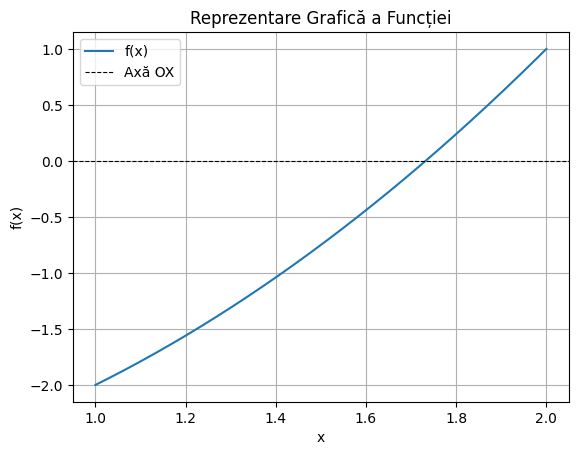

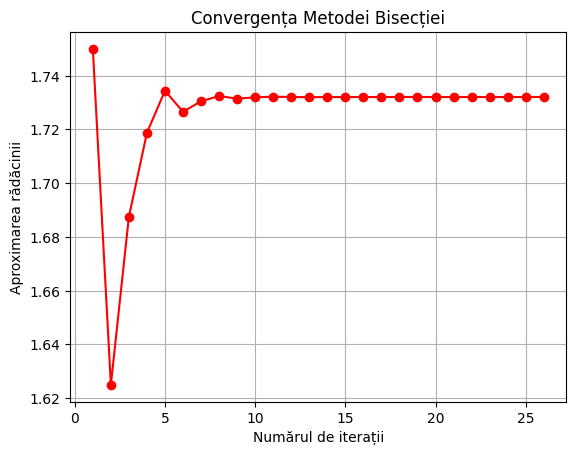

In [ ]:
#metoda Bisectiei
import matplotlib.pyplot as plt
import numpy as np

def metoda_bisectiei(f, a, b, toleranta=1e-8, max_iteratii=10**4):
    """
    Aproximează rădăcina funcției f folosind metoda bisecției.

    Parametri:
    - f: Funcția pentru care se caută rădăcina.
    - a, b: Capetele intervalului inițial [a, b] în care se caută rădăcina.
    - toleranta: Toleranța pentru aproximarea rădăcinii.
    - max_iteratii: Numărul maxim de iterații permis.

    Returnează:
    - Aproximarea rădăcinii și numărul de iterații efectuate.
    """
    iteratii = 0

    while (b - a) / 2 > toleranta and iteratii < max_iteratii:
        c = (a + b) / 2
        valoare_c = f(c)

        if valoare_c == 0:
            break  # Am găsit rădăcina exactă
        elif f(a) * valoare_c < 0:
            b = c
        else:
            a = c

        iteratii += 1

    aproximare_radacina = (a + b) / 2
    return aproximare_radacina, iteratii

# Exemplu de utilizare:
def f(x):
    return x**2 - 3

radacina_aproximata, numar_iteratii = metoda_bisectiei(f, 1, 2)

print(f"Aproximarea rădăcinii: {radacina_aproximata}")
print(f"Numărul de iterații efectuate: {numar_iteratii}")

# Afișarea funcției într-un grafic
x_valori = np.linspace(1, 2, 1000)
y_valori = f(x_valori)

plt.plot(x_valori, y_valori, label='f(x)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Axă OX')
plt.legend()
plt.title('Reprezentare Grafică a Funcției')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Aplicarea metodei bisecției și reprezentarea convergenței
radacina_aproximata, numar_iteratii = metoda_bisectiei(f, 1, 2)

# Crearea unei liste cu iterațiile pentru reprezentare grafică
iteratii = list(range(1, numar_iteratii + 1))
aproximari_radicina = []

for i in range(numar_iteratii):
    radacina_aproximata, _ = metoda_bisectiei(f, 1, 2, max_iteratii=i + 1)
    aproximari_radicina.append(radacina_aproximata)

# Reprezentare grafică a convergenței
plt.plot(iteratii, aproximari_radicina, marker='o', linestyle='-', color='r')
plt.title('Convergența Metodei Bisecției')
plt.xlabel('Numărul de iterații')
plt.ylabel('Aproximarea rădăcinii')
plt.grid(True)
plt.show()


In [ ]:
#%%1. METODA BISECTIEI

def bisectie(f,a0,b0, ITMAX, TOL, OPT = 1):
    a = [a0]
    b = [b0]
    x = [a[0] + (b[0] - a[0])/2]
    n = 0
    conditie = 1
    if (OPT == 1):
        conditie = np.abs(b[n]- a[n]) > TOL
    elif (OPT == 3):
        conditie = np.abs(f(x[n]))>TOL
    while (conditie and n<=ITMAX):
        n = n + 1
        if f(a[n-1]) * f(x[n-1])<=0:
            a.append(a[n-1])     #an = an-1
            b.append(x[n-1])     #bn = xn-1
        else:
            a.append(x[n-1])     #an = xn-1
            b.append(b[n-1])     #bn = bn-1
        x.append(a[n] + (b[n] - a[n])/2 )
        if (OPT == 1):
            conditie = np.abs(b[n]- a[n]) > TOL
        elif (OPT == 2):
            conditie = np.abs(x[n] - x[n-1])/np.abs(x[n-1]) > TOL
        elif (OPT == 3):
            conditie = np.abs(f(x[n]))>TOL
    return x[n],n


In [ ]:
#Metoda Punctului Fix
def MetPunctFix2(phi, x0, N):
    x = np.zeros(N + 1)  # are elemente de la x0 pana la xn
    x[0] = x0
    for n in range(1, N + 1):
        x[n] = phi(x[n - 1])
    return x[n]
# Funcția originală
def f(x):
    return x**3+4*(x**2)-10

# Funcția auxiliară cu punct fix
def phi(x):
    return np.sqrt((10/x)-4*x)
n=4
y=np.zeros(n+1)
for i in(1,n):
 y[i]=phi(i)
# Aplicarea metodei punctului fix
radacina_aproximata, numar_iteratii = MetPunctFix2(phi, y[0])

print(f"Aproximarea rădăcinii: {radacina_aproximata}")
print(f"Numărul de iterații efectuate: {numar_iteratii}")


<ipython-input-23-8af571aa4211>:14: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((10/x)-4*x)


TypeError: ignored

In [ ]:
#%%2. METODA PUNCTULUI FIX

def MetPunctFix(phi, x0, N):
    x = np.zeros(N + 1)  # are elemente de la x0 pana la xn
    x[0] = x0
    for n in range(1, N + 1):
        x[n] = phi(x[n - 1])
    return x[n]

In [ ]:
#3. NewtonRaphson

def NewtonRaphson2(f,df,x0,N):
  x=np.zeros(N+1)
  x[0]=x0
  i=1
  while i<=N:
    x[i]=x[i-1]-(f(x[i-1]/df(x[i-1])))
    i+=1
  return x
def f(x):
      return x+(np.exp(-(x**2))*np.cos(x))

def df(x):
      return  1- 2*(np.exp(-(x**2))*np.cos(x))-(np.exp(-(x**2))*np.sin(x))

x0=1
N=20
print(NewtonRaphson2(f,df,x0,N))

[ 1.         -2.41403404 -0.0129163  -1.02575114 -0.0683997  -1.1346148
 -0.14549823 -1.27937261 -0.17871327 -1.33682455 -0.17791772 -1.33550677
 -0.17799869 -1.33564106 -0.17799056 -1.33562757 -0.17799138 -1.33562893
 -0.1779913  -1.33562879 -0.17799131]


In [ ]:
#%%3. METODA NewtonRaphson

def NewtonRaphson(f, df, x0, N):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N + 1):
        x[n] = x[n - 1] - f(x[n - 1]) / df(x[n - 1])
    return x

In [ ]:
#%%4. METODA NewtonRaphson MODIFICATA (1), UNDE SE CUNOASTE M

def NewtonRaphsonmodificata1(m,f,df,x0,ITMAX,TOL):
    X=sp.Symbol("X")
    F=f(X) #F este o expresie simbolica construita in baza functiei f
    dF=df(X)
    PHI=sp.simplify(X-(m*F)/dF)
    phi=sp.lambdify(X,PHI,"numpy")
    x=np.zeros(ITMAX)
    x[0]=x0
    n=0
    for n in range(1,ITMAX):
        x[n]=phi(x[n-1])
        if np.abs(x[n]-x[n-1])<TOL:
            return x,n
    return x,n

In [ ]:
#%%5. METODA POZITIEI FALSE

def Pozitiefalsaf(f, a, b, N):
    x = np.zeros(N+1)
    n = 1
    x[n-1] = a
    x[n] = b
    err = np.zeros(N)
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    n=2
    x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(3, N+1):
        if f(x[n-1])*f(x[n-2])<=0:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        else:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-3])/(f(x[n-1])-f(x[n-3]))
            x[n-2]=x[n-3]
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )

    return x[n], err

In [ ]:
#%%6. METODA SECANTEI

def Secantaf(f, x0, x1, N):
    x = np.zeros(N+1)
    x[0] = x0
    x[1] = x1
    n = 1
    err = np.zeros(N)
    err[0] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(2, N+1):
        x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
        err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return x[n], err